In [1]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torch
import pytorch_lightning as LIT

# Define the root directory where the image folders are located
root_dir = 'images'
batch_size = 16
MAX_EPOCHS = 100

# Define the transformations to be applied to the images
transform = transforms.Compose([
    # do random crop with 320x320
    #transforms.RandomResizedCrop([480, 640], scale=(0.8, 1.2), ratio=(1.0, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    #transforms.RandomGrayscale(p=0.2),

    # Convert the images to tensors
    transforms.ToTensor(),  
    # Normalize the images
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Create the ImageFolder dataset
dataset = ImageFolder(root=root_dir, transform=transform)


In [2]:
from sklearn.model_selection import train_test_split
train_set, valid_test_set = train_test_split(dataset, test_size=0.2, random_state=42)
test_set, valid_set = train_test_split(valid_test_set, test_size=0.5, random_state=42)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=8, persistent_workers=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [3]:
train_batch = next(iter(train_loader))

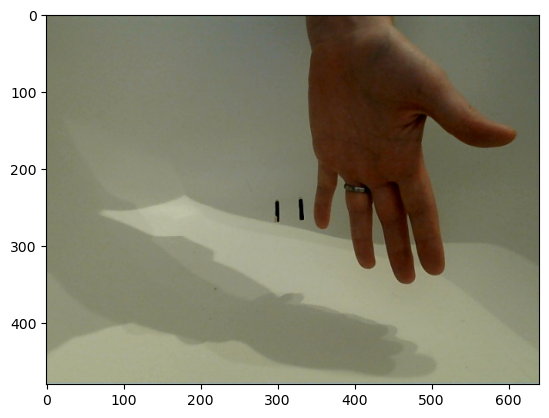

In [4]:
import matplotlib.pyplot as plt
def denormalize(img):
    img = img * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    img = img + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    return img

plt.imshow(denormalize(train_batch[0][0]).permute(1, 2, 0))

In [5]:
train_batch[1]

tensor([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [6]:
import model
model.MAX_EPOCHS = MAX_EPOCHS
chiros = model.Chiros()

In [7]:
# test 
y = chiros(train_batch[0])

In [8]:
trainer = LIT.Trainer(
    accelerator="cuda",
    max_epochs=MAX_EPOCHS,
    precision=16
)

trainer.fit(chiros, train_loader, valid_loader)

# save model 
torch.save(chiros.state_dict(), 'chiros.pth')

c:\Users\psodm\anaconda3\Lib\site-packages\lightning_fabric\connector.py:565: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\psodm\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\psodm\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
c:\Users\psodm\anaconda3\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:293: The number of training batches (12) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
print(meow)

: 